# New York City Taxi Fare Prediction
    
## Problem Statement

A taxicab, also known as a taxi or a cab, is a type of vehicle for hire with a driver, used by a single passenger or small group of passengers, often for a non-shared ride. A taxicab conveys passengers between locations of their choice.In New York, taxis are generally divided into two categories: yellow and green.Painted yellow taxis, also known as medallion taxis, can pick up passengers anywhere in the five major boroughs of New York: the Bronx, brooklyn, Manhattan, queens and staten island.
In August 2013, another color taxi appeared on the streets of New York -- green taxi, or boro taxi.Taxis painted green are allowed to pick up passengers only in upper Manhattan, the Bronx, queens and staten island, not including laguardia and JFK in queens.Both are operated by private companies and regulated by the New York City taxi and limousine commission.

https://en.wikipedia.org/wiki/Taxicab

https://zhidao.baidu.com/question/570487510.html

http://auto.people.com.cn/n/2015/0114/c1005-26383651.html

![taxicab.jpg](https://cdn10.phillymag.com/wp-content/uploads/sites/3/2017/11/taxicab-900x600.jpg)

### Predicting the fare amount 
Cabs in the United States also charge fares. Starting at \$2.50 (within 0.2 miles) in New York, then adding 40 cents for every 0.2 miles or two minutes of waiting. From 8 p.m. to 6 a.m., there is a surcharge of \$0.50 for overnight travel. Add \$1 during rush hour (Monday through Friday, 4pm to 8pm).In addition, passengers should bear any expenses incurred during the ride and pay an additional tip (more than 15\%).Airport access: from Manhattan to JFK for a flat fee of $45 per trip.The above is for reference only. In recent years, due to the serious fluctuation of oil price, New York taxi fares are often changed.
The task for this problem is to predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. 

## Dataset
In this problem, I will use the dataset "train.csv" and "test.csv" provided from [kaggle](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data) and try to build models that can help to make the prediction.

File descriptions：

+ train.csv - Input features and target fare_amount values for the training set (about 55M rows).
+ test.csv - Input features for the test set (about 10K rows). Your goal is to predict fare_amount for each row.
+ sample_submission.csv - a sample submission file in the correct format (columns key and fare_amount). This file 'predicts' fare_amount to be \$11.35 for all rows, which is the mean fare_amount from the training set.

Features：

+ pickup_datetime - timestamp value indicating when the taxi ride started
+ pickup_longitude - float for longitude coordinate of where the taxi ride started.
+ pickup_latitude - float for latitude coordinate of where the taxi ride started.
+ dropoff_longitude - float for longitude coordinate of where the taxi ride ended.
+ dropoff_latitude - float for latitude coordinate of where the taxi ride ended.
+ passenger_count - integer indicating the number of passengers in the taxi ride.

## Prediction
 My aim is to predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations.While we can get a basic estimate based on just the distance between the two points, this will result in an RMSE of \$5-\$8, depending on the model used. The challenge is to do better than this using Machine Learning techniques.
 

## First Experiment

In [1]:
# load some default Python modules
import numpy as np
import pandas as pd
import scipy as scipy
import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn, is a library that based on matplotlib and is easier to customize into diagrams
                      #一个以matplotlib为底层，更容易定制化作图的库Seaborn
from sklearn.model_selection import train_test_split
from datetime import datetime
from PIL import Image

I will just take 100,000 rows of the data from the train.csv file since it needs a lot of time to load all the data and need a lot of memory.

In [2]:
# Reading data
train_df = pd.read_csv('../project/train.csv',nrows = 100000,parse_dates=["pickup_datetime"])
# Drop rows with null values
train_df = train_df.dropna(how = 'any', axis = 'rows')

Assume the dataset to be not "clean" enough, we need to look into the data to clean it up.

In [3]:
# method learned from kaggle (https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration)
train_df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  9082.000000       9082.000000      9082.000000        9082.000000   
mean     11.249600        -72.457098        39.920683         -72.457326   
std       9.671404         10.632737         7.394327          10.626990   
min      -2.900000        -74.438233       -74.006893         -74.429332   
25%       6.000000        -73.992117        40.734419         -73.991121   
50%       8.500000        -73.981812        40.752679         -73.980114   
75%      12.500000        -73.967005        40.767514         -73.963665   
max     180.000000         40.766125       401.083332          40.763367   

       dropoff_latitude  passenger_count  
count       9082.000000      9082.000000  
mean          39.886246         1.650077  
std            6.334676         1.276538  
min          -73.994392         0.000000  
25%           40.735235         1.000000  
50%           40.753714         1.000000  
75%           40.768005         2.000000  
max           41.366138         6.000000

Since there are some unreasonable value such as negative value of distance, we need to clean the dataset.

In [4]:
#Take a genral look at the dataset
train_df.head(5)

key  fare_amount           pickup_datetime  pickup_longitude  \
0  26:21.0          4.5 2009-06-15 17:26:21+00:00        -73.844311   
1  52:16.0         16.9 2010-01-05 16:52:16+00:00        -74.016048   
2  35:00.0          5.7 2011-08-18 00:35:00+00:00        -73.982738   
3  30:42.0          7.7 2012-04-21 04:30:42+00:00        -73.987130   
4  51:00.0          5.3 2010-03-09 07:51:00+00:00        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.721319         -73.841610         40.712278                1  
1        40.711303         -73.979268         40.782004                1  
2        40.761270         -73.991242         40.750562                2  
3        40.733143         -73.991567         40.758092                1  
4        40.768008         -73.956655         40.783762                1

Location method I learned from kaggle,https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration

While the location value are not all good, we need to drop the value that are not in NewYork city.New York city coordinates are:
+ longitude = -74.0063889
+ lattitude = 40.7141667

https://www.travelmath.com/cities/New+York,+NY
Also use the following website:

+ Easy to use map and GPS tool: https://www.gps-coordinates.net/
+ Calculate distance between locations: https://www.travelmath.com/flying-distance/
+ Open street map to grab using bouding box a map: https://www.openstreetmap.org/export#map=8/52.154/5.295

Then,define a bounding box of interest by [long_min, long_max, latt_min, latt_max] using the minimum and maximum coordinates from the testset. From this way we can train a model for the full pickup/dropoff coordinate range of the test set.

In [5]:
#read the test dataset and compare it with the training dataset
test_df = pd.read_csv('../project/test.csv')
test_df.head(5)

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1  
2        40.751260         -73.979654         40.746139                1  
3        40.767807         -73.990448         40.751635                1  
4        40.789775         -73.988565         40.744427                1

In [6]:
# First, see the minmum and maximum of the coordinate in the dataset respectively
#longitude
min(test_df.pickup_longitude.min(), test_df.dropoff_longitude.min()), \
max(test_df.pickup_longitude.max(), test_df.dropoff_longitude.max())

(-74.263242, -72.986532)

In [7]:
#latitude
min(test_df.pickup_latitude.min(), test_df.dropoff_latitude.min()), \
max(test_df.pickup_latitude.max(), test_df.dropoff_latitude.max())

(40.568973, 41.709555)

In [8]:
# method to set boundary box of NYC 
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

nyx_map:

![NYC MAP.png](https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png)

nyx_map_zoom:

![NYC ZOOM MAP.png](https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png)

In [9]:
nyc_map

array([[[0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        ...,
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ]],

       [[0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        ...,
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ]],

       [[0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        ...,
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.980392

In [10]:
nyc_map_zoom

array([[[0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        ...,
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ]],

       [[0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        ...,
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ]],

       [[0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.98039216, 1.        , 1.        ],
        ...,
        [0.98039216, 0.98039216, 1.        , 1.        ],
        [0.98039216, 0.980392

In [11]:
# call the method to select the point within the bounding box
print('Old size: %d' % len(train_df))
train_df = train_df[select_within_boundingbox(train_df, BB)]
print('New size: %d' % len(train_df))

Old size: 9082
New size: 8888


In [12]:
# method to plot data on map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)


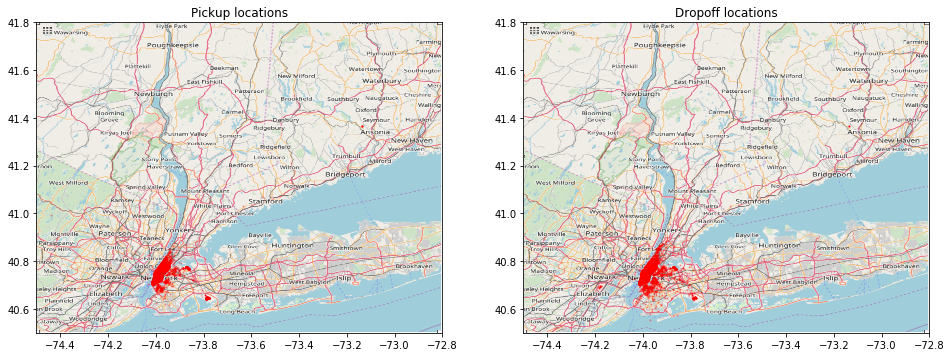

In [13]:
# plot training data on map
plot_on_map(train_df, BB, nyc_map, s=1, alpha=0.3)

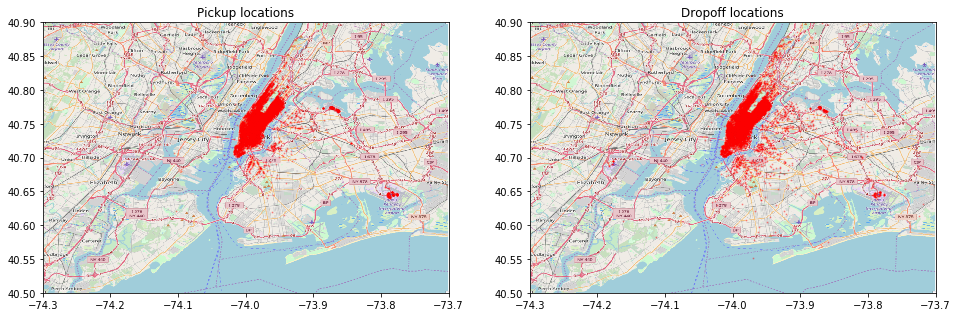

In [14]:
# plot training data on map zoomed in
plot_on_map(train_df, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

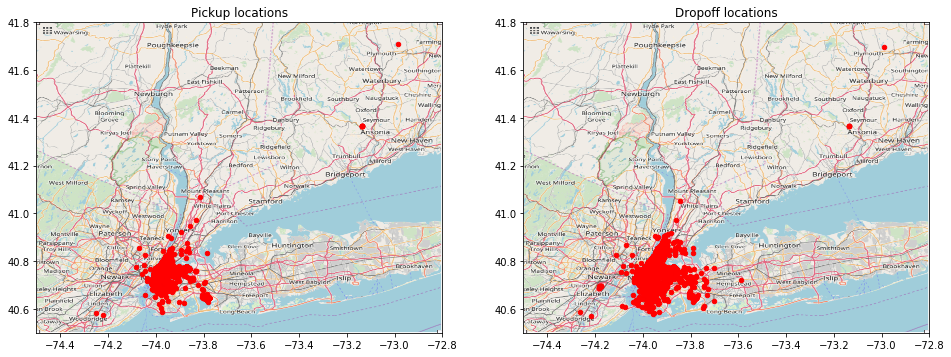

In [15]:
# plot test data on map
plot_on_map(test_df, BB, nyc_map, alpha=1.0, s=20)

From the training data scatter plot we see that some locations are in the water. 

In [16]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

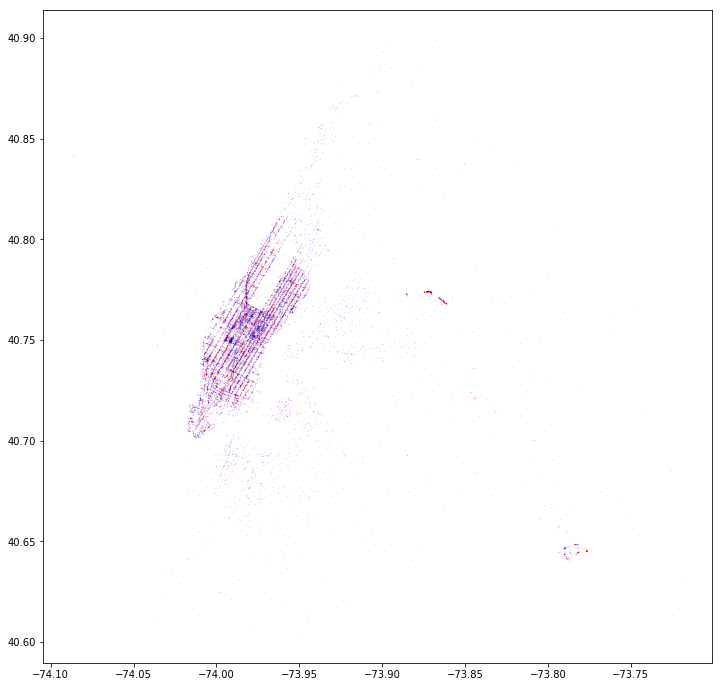

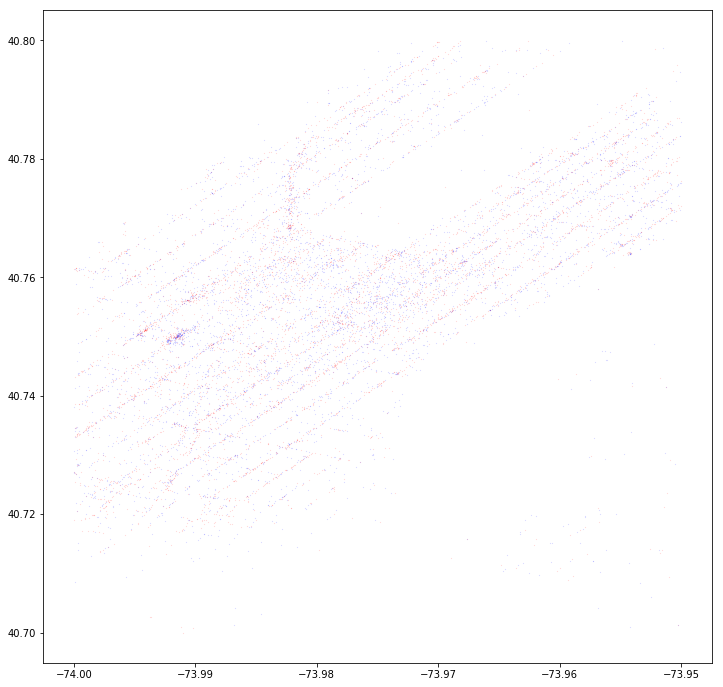

In [17]:
plot_hires(train_df, (-74.1, -73.7, 40.6, 40.9))
plot_hires(train_df, (-74, -73.95, 40.7, 40.8))

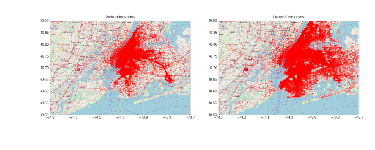

In [18]:
img=Image.open('../project/water.png')
plt.axis('off')
plt.imshow(img)
plt.show()

As can be seen from the map + scatter plots above, some datapoints are located in the water. These are obviously noisy datapoints. To remove these datapoints, the blogger from kaggle creates a boolean land/water map from the NYC map. And he used Photoshop to threshold on the blue color of the water and to cleanup the map. The resulting map is show below.

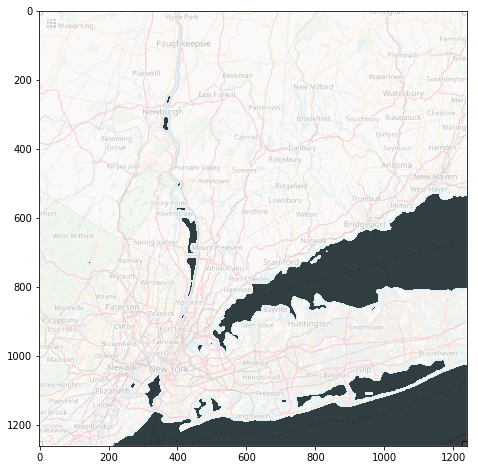

In [19]:
# read nyc mask and turn into boolean map with
# land = True, water = False
nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')

plt.figure(figsize=(8,8))
plt.imshow(nyc_map, zorder=0)
plt.imshow(nyc_mask, zorder=1, alpha=0.7); 
# note: True is show in black, False in white, which means land is in black and water is in white.

Next, we need to convert longitude/latitude coordinates to xy pixel coordinates. The function lonlat_to_xy implements this transformation. **Note that the y coordinate needs to be reversed as the image y-axis is directed from top to bottom.**

Once for all datapoints the xy pixel coordinates are calculate a boolean index is calculated using the NYC mask.

In [20]:
# translate longitude/latitude coordinate into image xy coordinate
def lonlat_to_xy(longitude, latitude, dx, dy, BB):
    return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
           (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

In [21]:
pickup_x, pickup_y = lonlat_to_xy(train_df.pickup_longitude, train_df.pickup_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], BB)
dropoff_x, dropoff_y = lonlat_to_xy(train_df.dropoff_longitude, train_df.dropoff_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], BB)

## Remove points from water

In [22]:
def remove_datapoints_from_water(df):
    def lonlat_to_xy(longitude, latitude, dx, dy, BB):
        return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
               (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

    # define bounding box
    BB = (-74.5, -72.8, 40.5, 41.8)
    
    # read nyc mask and turn into boolean map with
    # land = True, water = False
    nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0] > 0.9
    
    # calculate for each lon,lat coordinate the xy coordinate in the mask map
    pickup_x, pickup_y = lonlat_to_xy(df.pickup_longitude, df.pickup_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)
    dropoff_x, dropoff_y = lonlat_to_xy(df.dropoff_longitude, df.dropoff_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)    
    # calculate boolean index
    idx = nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x]
    
    # return only datapoints on land
    return df[idx]

In [23]:
print('Old size: %d' % len(train_df))
train_df = remove_datapoints_from_water(train_df)
print('New size: %d' % len(train_df))

Old size: 8888
New size: 8887


Check if all outliers in the water are gone

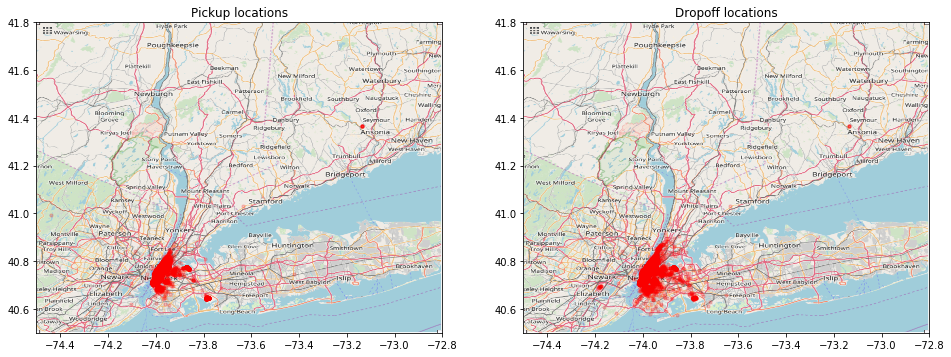

In [24]:
# plot training data
plot_on_map(train_df, BB, nyc_map)

### Datapoint density per sq mile

A scatterplot of the pickup and dropoff locations gives a quick impression of the density. However, it is more accurate to count the number of datapoints per area to visualize the density. The code below counts pickup and dropoff datapoints per sq miles. This gives a better view on the 'hot spots'.

methods below are learned from https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration

In [25]:
# For this plot and further analysis, we need a function to calculate the distance in miles between locations in lon,lat coordinates.
# This function is based on https://stackoverflow.com/questions/27928/
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# return distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

# First calculate two arrays with datapoint density per sq mile
n_lon, n_lat = 200, 200 # number of grid bins per longitude, latitude dimension
density_pickup, density_dropoff = np.zeros((n_lat, n_lon)), np.zeros((n_lat, n_lon)) # prepare arrays

# To calculate the number of datapoints in a grid area, the numpy.digitize() function is used. 
# This function needs an array with the (location) bins for counting the number of datapoints
# per bin.
bins_lon = np.zeros(n_lon+1) # bin
bins_lat = np.zeros(n_lat+1) # bin
delta_lon = (BB[1]-BB[0]) / n_lon # bin longutide width
delta_lat = (BB[3]-BB[2]) / n_lat # bin latitude height
bin_width_miles = distance(BB[2], BB[1], BB[2], BB[0]) / n_lon # bin width in miles
bin_height_miles = distance(BB[3], BB[0], BB[2], BB[0]) / n_lat # bin height in miles
for i in range(n_lon+1):
    bins_lon[i] = BB[0] + i * delta_lon
for j in range(n_lat+1):
    bins_lat[j] = BB[2] + j * delta_lat
    
# Digitize per longitude, latitude dimension
inds_pickup_lon = np.digitize(train_df.pickup_longitude, bins_lon)
inds_pickup_lat = np.digitize(train_df.pickup_latitude, bins_lat)
inds_dropoff_lon = np.digitize(train_df.dropoff_longitude, bins_lon)
inds_dropoff_lat = np.digitize(train_df.dropoff_latitude, bins_lat)

# Count per grid bin
# note: as the density_pickup will be displayed as image, the first index is the y-direction, 
#       the second index is the x-direction. Also, the y-direction needs to be reversed for
#       properly displaying (therefore the (n_lat-j) term)
dxdy = bin_width_miles * bin_height_miles
for i in range(n_lon):
    for j in range(n_lat):
        density_pickup[j, i] = np.sum((inds_pickup_lon==i+1) & (inds_pickup_lat==(n_lat-j))) / dxdy
        density_dropoff[j, i] = np.sum((inds_dropoff_lon==i+1) & (inds_dropoff_lat==(n_lat-j))) / dxdy

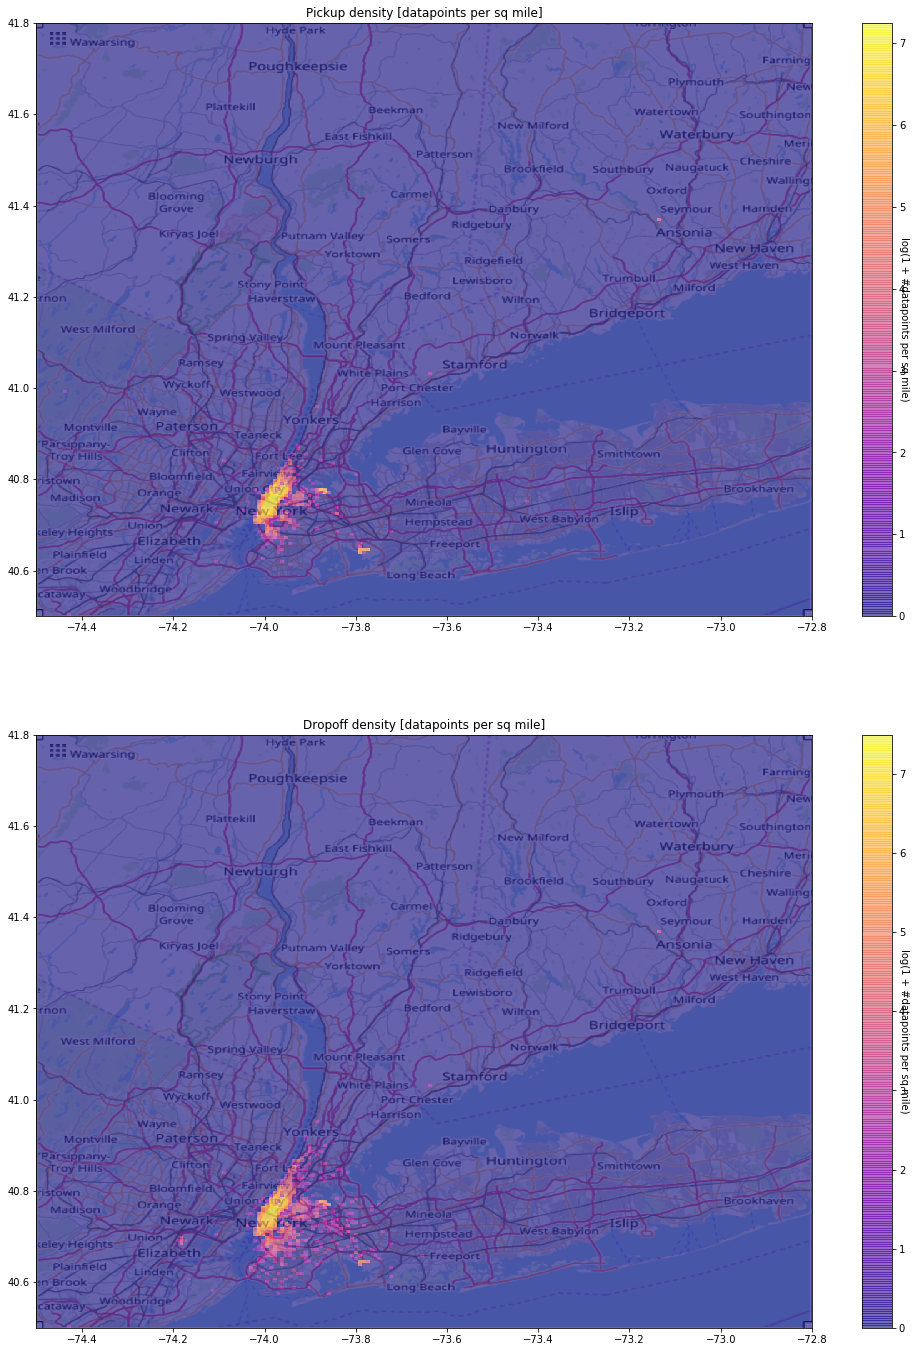

In [26]:
# Plot the density arrays
fig, axs = plt.subplots(2, 1, figsize=(18, 24))
axs[0].imshow(nyc_map, zorder=0, extent=BB);
im = axs[0].imshow(np.log1p(density_pickup), zorder=1, extent=BB, alpha=0.6, cmap='plasma')
axs[0].set_title('Pickup density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[0])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

axs[1].imshow(nyc_map, zorder=0, extent=BB);
im = axs[1].imshow(np.log1p(density_dropoff), zorder=1, extent=BB, alpha=0.6, cmap='plasma')
axs[1].set_title('Dropoff density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[1])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

## Pickup traffic density

By counting the number of pickups in an area we should get some impression of the traffic density. The more traffic, the longer it could take to make a drive.

### Time

In [ ]:
"""def add_datetime_info(dataset):
    #Convert to datetime format
    dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'],format="%Y-%m-%d %H:%M:%S UTC")
    
    dataset['hour'] = dataset.pickup_datetime.dt.hour
    dataset['day'] = dataset.pickup_datetime.dt.day
    dataset['month'] = dataset.pickup_datetime.dt.month
    dataset['weekday'] = dataset.pickup_datetime.dt.weekday
    dataset['year'] = dataset.pickup_datetime.dt.year
    
    return dataset
train_df = add_datetime_info(train_df)
"""

In [27]:
# add time information
train_df['year'] = train_df.pickup_datetime.apply(lambda t: t.year)
train_df['weekday'] = train_df.pickup_datetime.apply(lambda t: t.weekday())
train_df['hour'] = train_df.pickup_datetime.apply(lambda t: t.hour)

In [28]:
# some constants needed to calculate pickup traffic density
n_hours = 24
n_weekdays = 7
n_years = 7
n_bins_lon = 30
n_bins_lat = 30

# focus on traffic in Manhattan
BB_traffic = (-74.025, -73.925, 40.7, 40.8)

# define function to calculate pickup traffic density
def calculate_trafic_density(df):
    traffic = np.zeros((n_years, n_weekdays, n_hours, n_bins_lat, n_bins_lon))
    
    # To calculate the number of datapoints in a grid area, the numpy.digitize() function is used. 
    # This function needs an array with the (location) bins for counting the number of datapoints
    # per bin.
    bins_lon = np.zeros(n_bins_lon+1) # bin
    bins_lat = np.zeros(n_bins_lat+1) # bin
    
    delta_lon = (BB_traffic[1]-BB_traffic[0]) / n_bins_lon # bin longutide width
    delta_lat = (BB_traffic[3]-BB_traffic[2]) / n_bins_lat # bin latitude height
    
    for i in range(n_bins_lon+1):
        bins_lon[i] = BB_traffic[0] + i * delta_lon
    for j in range(n_bins_lat+1):
        bins_lat[j] = BB_traffic[2] + j * delta_lat
    
    # Count per grid bin
    # note: as the density_pickup will be displayed as image, the first index is the y-direction, 
    #       the second index is the x-direction. Also, the y-direction needs to be reversed for
    #       properly displaying (therefore the (n_lat-j) term)
    for y in range(n_years):
        for d in range(n_weekdays):
            for h in range(n_hours):
                idx = (df.year==(2009+y)) & (df.weekday==d) & (df.hour==h)

                # Digitize per longitude, latitude dimension
                inds_pickup_lon = np.digitize(df[idx].pickup_longitude, bins_lon)
                inds_pickup_lat = np.digitize(df[idx].pickup_latitude, bins_lat)

                for i in range(n_bins_lon):
                    for j in range(n_bins_lat):
                        traffic[y, d, h, j, i] = traffic[y, d, h, j, i] + \
                                                 np.sum((inds_pickup_lon==i+1) & (inds_pickup_lat==j+1))
    
    return traffic 

# define function to plot pickup traffic density
def plot_traffic(traffic, y, d):
    days = {'monday' : 0, 'tuesday' : 1, 'wednesday' : 2, 'thursday' : 3, 'friday' : 4, 'saturday' : 5, 'sunday' : 6}
    fig, axs = plt.subplots(3,8,figsize=(18,7))
    axs = axs.ravel()
    for h in range(24):
        axs[h].imshow(traffic[y-2009,days[d],h,::-1,:], zorder=1, cmap='coolwarm', clim=(0, traffic.max()))
        axs[h].get_xaxis().set_visible(False)
        axs[h].get_yaxis().set_visible(False)
        axs[h].set_title('h={}'.format(h))
    fig.suptitle("Pickup traffic density, year={}, day={} (max_pickups={})".format(y, d, traffic.max()))

Then calculate the density and visualize the plots.

In [29]:
traffic = calculate_trafic_density(train_df)

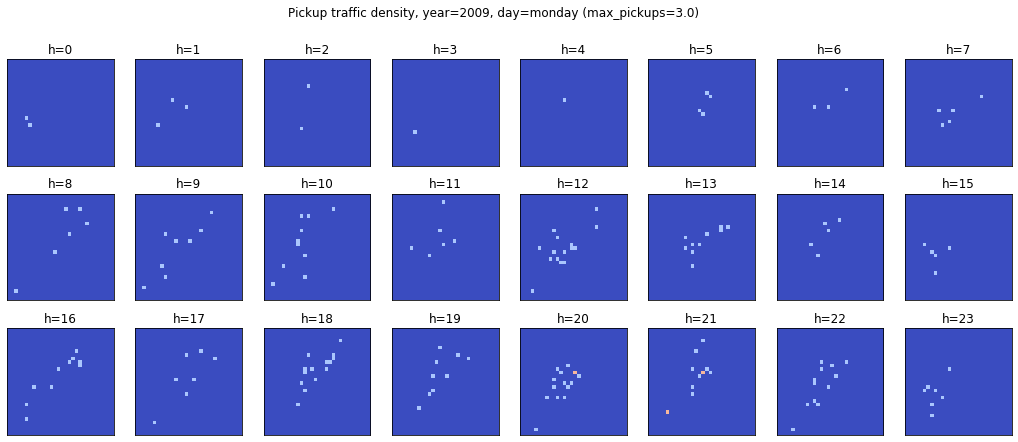

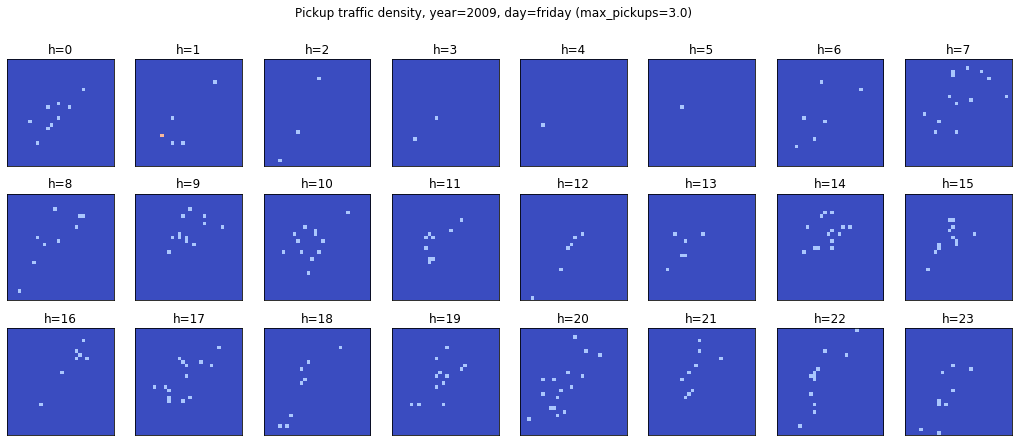

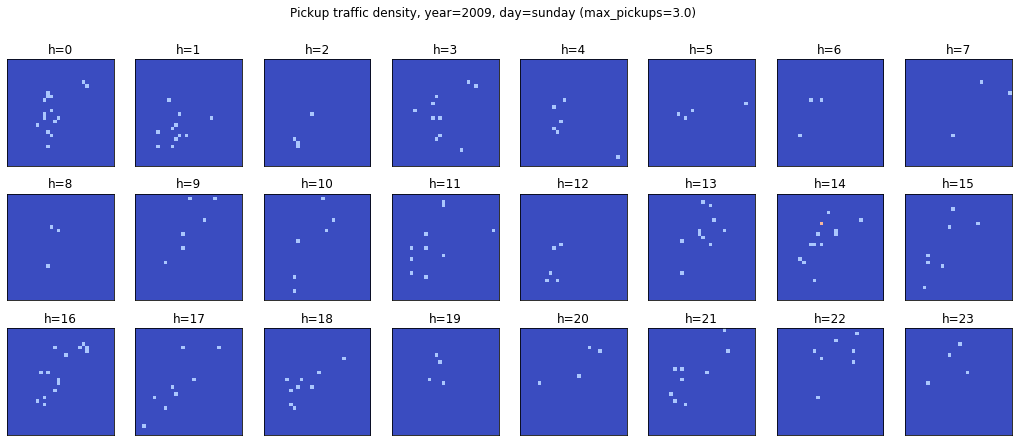

In [30]:
plot_traffic(traffic, 2009, 'monday')
plot_traffic(traffic, 2009, 'friday')
plot_traffic(traffic, 2009, 'sunday')

Already from these plots we can see the different traffic density patterns by the hour, but also by location. E.g. at sunday h=0-3 hour (saturday night to sunday) there is more traffic than on weekdays. I presume this is from people going out and enjoying the weekend. Also visualize an other year.

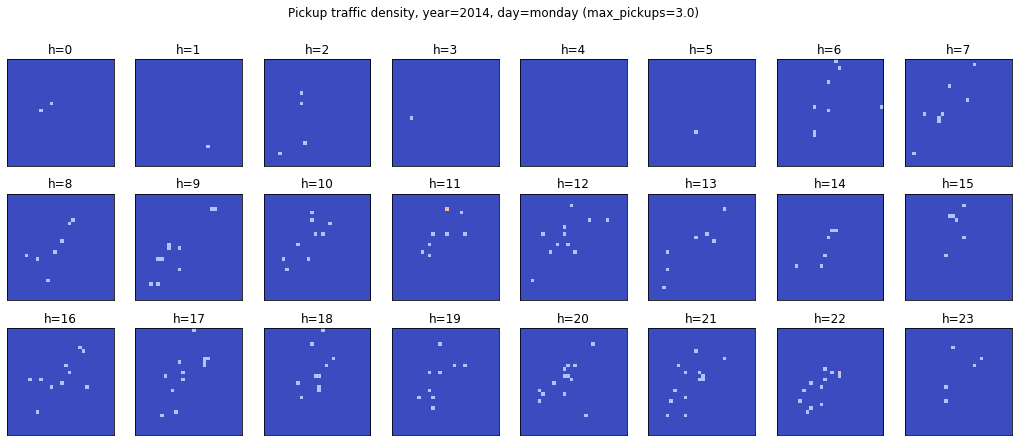

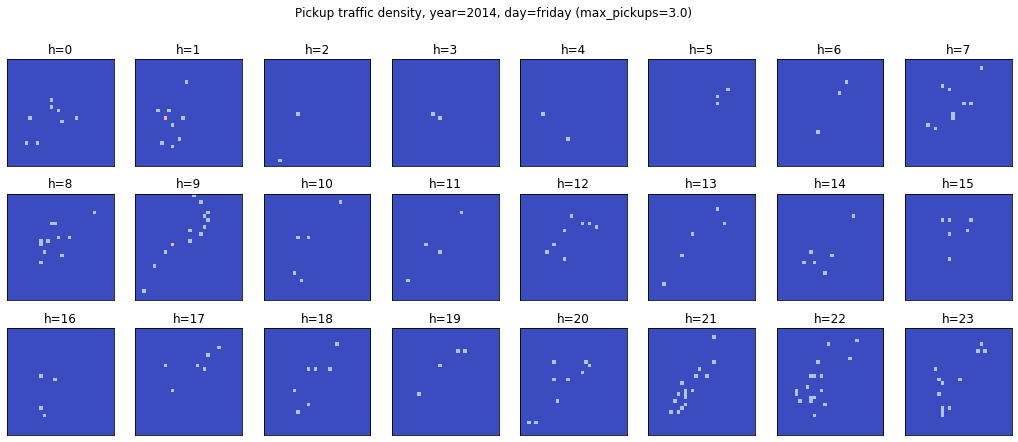

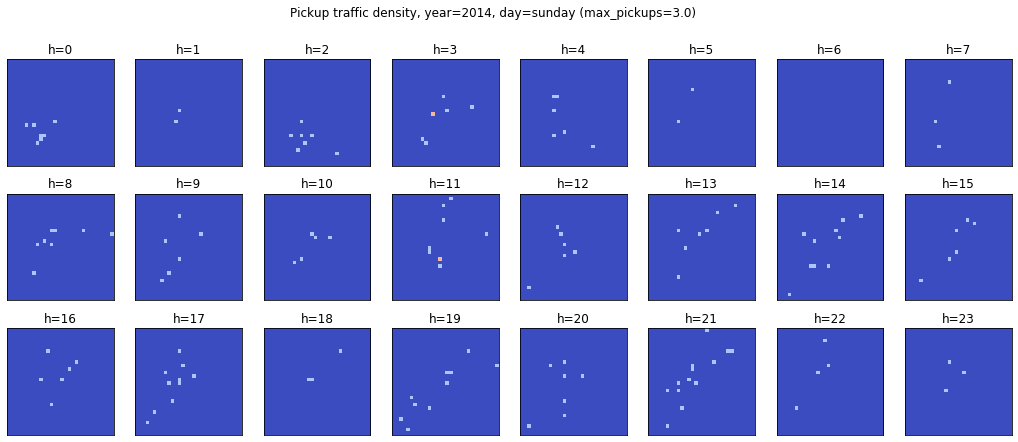

In [31]:
plot_traffic(traffic, 2014, 'monday')
plot_traffic(traffic, 2014, 'friday')
plot_traffic(traffic, 2014, 'sunday')

### Distance

Also, distance also matters. The longer the distance between pickup and dropoff location,the higher the fare
To visualize the distance - fare relation we need to calculate the distance of a trip first.

count    8887.000000
mean        2.099934
std         2.652266
min         0.000000
25%         0.775156
50%         1.340515
75%         2.419939
max        62.817285
Name: distance_miles, dtype: float64

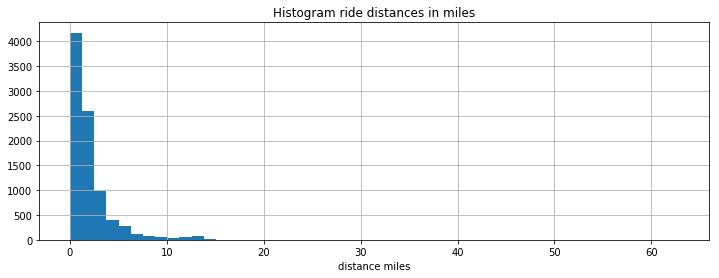

In [32]:
# add new column to dataframe with distance in miles
train_df['distance_miles'] = distance(train_df.pickup_latitude,train_df.pickup_longitude, \
                                      train_df.dropoff_latitude, train_df.dropoff_longitude)

train_df.distance_miles.hist(bins=50, figsize=(12,4))
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
train_df.distance_miles.describe()

It seems that most rides are just short rides, with a small peak at ~13 miles. This peak could be due to airport drives.

### Passenger_count
See the influence of passenger_count.

In [33]:
train_df.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()

distance_miles  fare_amount
passenger_count                             
0                      1.904351     9.352778
1                      2.060802    11.062171
2                      2.289302    12.161732
3                      2.068884    11.392935
4                      2.147118    11.242410
5                      2.137375    11.164100
6                      2.040706    11.681242

A passenger_count of zero seems odd. Perhaps a taxi transporting some goods.

Instead of looking to the fare_amount using the 'fare per mile' also provides some insights.

In [34]:
print("Average $USD/Mile : {:0.2f}".format(train_df.fare_amount.sum()/train_df.distance_miles.sum()))

Average $USD/Mile : 5.36


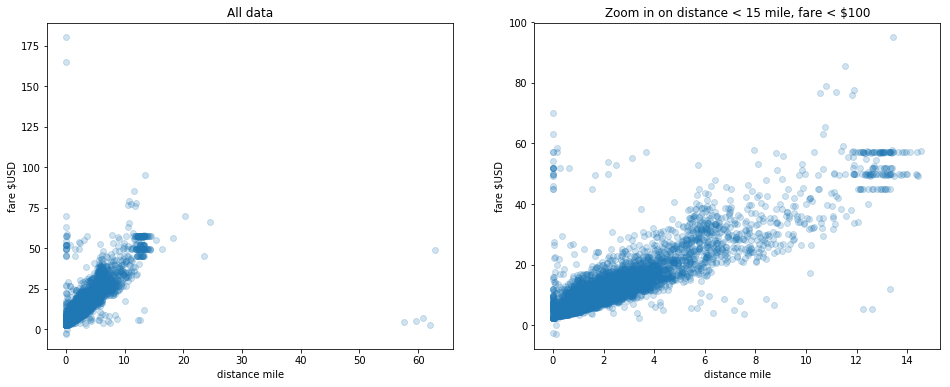

In [35]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(train_df.distance_miles, train_df.fare_amount, alpha=0.2)
axs[0].set_xlabel('distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# zoom in on part of data
idx = (train_df.distance_miles < 15) & (train_df.fare_amount < 100)
axs[1].scatter(train_df[idx].distance_miles, train_df[idx].fare_amount, alpha=0.2)
axs[1].set_xlabel('distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance < 15 mile, fare < $100');

From this plot we notice:

+ There are trips with zero distance but with a non-zero fare. Could this be trips from and to the same location? Predicting these fares will be difficult as there is likely not sufficient information in the dataset.
+ There are some trips with >50 miles travel distance but low fare. Perhaps these are discounted trips? Or the previously mentioned hotspot near Seymour (see density plots above)?
+ The horizontal lines in the right plot might indicate again the fixed fare trips to/from JFK airport.
+ Overall there seems to be a (linear) relation between distance and fare with an average rate of +/- 100/20 = 5 $USD/mile.

As we listed before, the NYC taxi fare prices:
+ \$4.00 – \$10.00 for 3km trip (https://www.priceoftravel.com/555/world-taxi-prices-what-a-3-kilometer-ride-costs-in-72-big-cities/)
+ Start range: \$2.50 - \$3.30, 1km range: \$1.55 - \$2.98 (https://www.numbeo.com/taxi-fare/in/New-York)  
+ Initial charge for most rides (excluding from JFK and other airports) is \$2.50 upon entry. After that there \$0.5 every unit where the unit is defined as 1/5th of a mile or when the Taxicab is travelling 12 Miles an hour or more...since we can't decipher the velocity of the car, I would take 1/5th of a mile as the unit and convert the distance into this unit.
+ \$0.5 of additional surcharge between 8PM - 6AM.
+ Peak hour weekday surcharge of $1 Monday-Friday between 4PM-8PM.
+ There is a \$0.5 MTA State Surcharge for all trips that end in New York City or Nassau, Suffolk, Westchester, Rockland, Dutchess, Orange or Putnam Counties.
+ There is a \$0.3 Improvement surcharge

In [36]:
# remove datapoints with distance <0.05 miles
idx = (train_df.distance_miles >= 0.05)
print('Old size: %d' % len(train_df))
train_df = train_df[idx]
print('New size: %d' % len(train_df))

Old size: 8887
New size: 8753


### some trips, like to/from an airport, are fixed fee
Another way to explore this data is to check trips to/from well known places. E.g. a trip to JFK airport. Depending on the distance, a trip to an airport is often a fixed price.

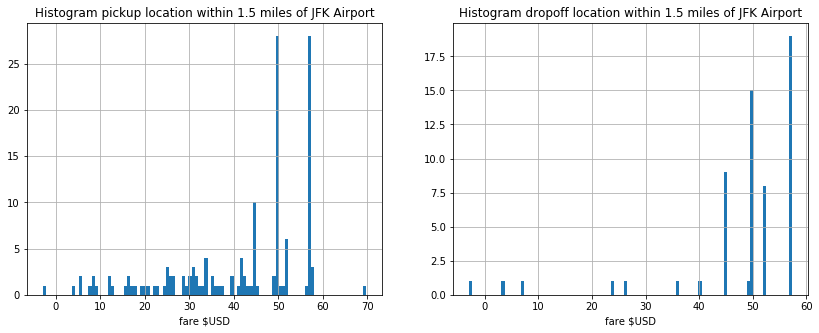

In [37]:
# JFK airport coordinates, see https://www.travelmath.com/airport/JFK
jfk = (-73.7822222222, 40.6441666667)
nyc = (-74.0063889, 40.7141667)

def plot_location_fare(loc, name, range=1.5):
    # select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    idx = (distance(train_df.pickup_latitude, train_df.pickup_longitude, loc[1], loc[0]) < range)
    train_df[idx].fare_amount.hist(bins=100, ax=axs[0])
    axs[0].set_xlabel('fare $USD')
    axs[0].set_title('Histogram pickup location within {} miles of {}'.format(range, name))

    idx = (distance(train_df.dropoff_latitude, train_df.dropoff_longitude, loc[1], loc[0]) < range)
    train_df[idx].fare_amount.hist(bins=100, ax=axs[1])
    axs[1].set_xlabel('fare $USD')
    axs[1].set_title('Histogram dropoff location within {} miles of {}'.format(range, name));
    
plot_location_fare(jfk, 'JFK Airport')

It seems that there are some fixed prices to/from the airport. Also, somebody might have paid way too much.
Check with the other two airports.

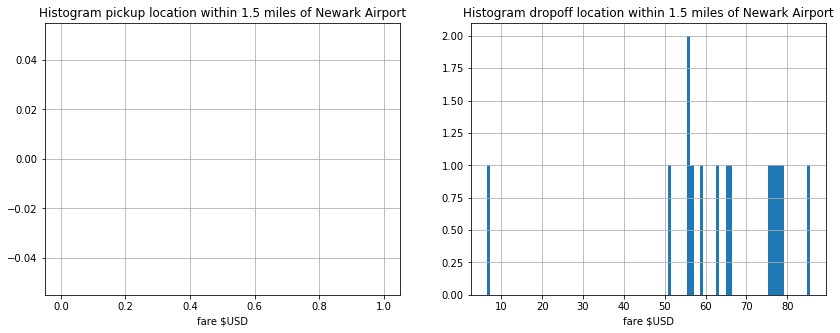

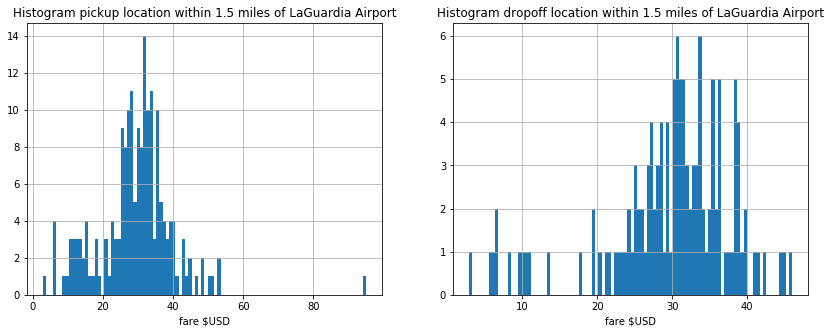

In [38]:
ewr = (-74.175, 40.69) # Newark Liberty International Airport, see https://www.travelmath.com/airport/EWR
lgr = (-73.87, 40.77) # LaGuardia Airport, see https://www.travelmath.com/airport/LGA
plot_location_fare(ewr, 'Newark Airport')
plot_location_fare(lgr, 'LaGuardia Airport')

#### Fare at night is different from day time
To visualize the relation between time and fare/km three more columns are added to the data: the year, the hour of the day and the fare $USD per KM.

In [39]:
train_df['fare_per_mile'] =train_df.fare_amount / train_df.distance_miles
train_df.fare_per_mile.describe()

count    8753.000000
mean        7.513571
std        12.459823
min       -25.333649
25%         4.742900
50%         6.113024
75%         8.080862
max       493.255261
Name: fare_per_mile, dtype: float64

The maximum fare \$USD/mile seem to be very high. This could be due to wrong distance or fare data. On the other hand, let's analyse this somewhat further. In general taxi fare is calculate by

$y_{fare}$= $\theta_0$ + $\theta_1$ X $X_{distance}$ + $\theta_2$ X $X_{duration}$

with  $\theta_0$  the starting tariff,  $X_{distance}$  the distance travelled and  $X_{duration}$  the duration of the trip. If we rewrite this we get an expression for the fare per distance:

$\frac{y_{fare}}{X_{distance}}$ = $\frac{\theta_0}{X_{distance}}$ + $\theta_1$ + $\theta_2$ X $\frac{X_{duration}}{X_{distance}}$

Let's further assume for the shorter trips that ：
$X_{distance}$ = $c \times X_{duration}$ with x the average speed, then we can get:

$\frac{y_{fare}}{X_{distance}}$ = $\frac{\theta_0}{X_{distance}}$ + $\theta_1$ + $\frac{\theta_2}{c}$ X $\frac{X_{duration}}{X_{duration}}$ = $\frac{\theta_0}{X_{distance}}$ + $\theta_1$'

with $\theta_1$' = $\theta_1$ + $\frac{\theta_2}{c}$

+ Conclusion: the fare per distance is proportional to  1/distance_mile . 

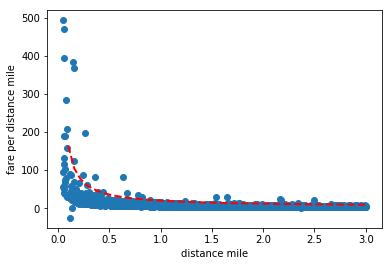

In [40]:
# draw this graph
idx = (train_df.distance_miles < 3) & (train_df.fare_amount < 100)
plt.scatter(train_df[idx].distance_miles, train_df[idx].fare_per_mile)
plt.xlabel('distance mile')
plt.ylabel('fare per distance mile')

# theta here is estimated by hand
theta = (16, 4.0)
x = np.linspace(0.1, 3, 50)
plt.plot(x, theta[0]/x + theta[1], '--', c='r', lw=2);

Continue with the time vs fare per distance analysis. Next we use a pandas pivot table to calculate a summary and to plot them.

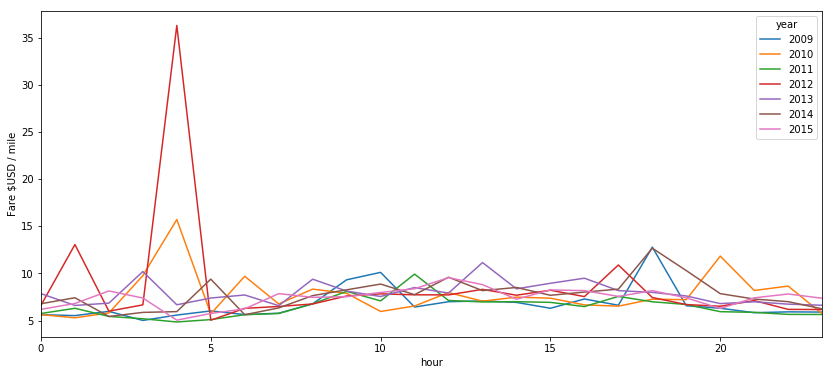

In [41]:
# display pivot table
train_df.pivot_table('fare_per_mile', index='hour', columns='year').plot(figsize=(14,6))
plt.ylabel('Fare $USD / mile');

It can be clearly seen that the fare \$USD/mile varies over the years and over the hours.

To investigate this further, use Google map to calculate the expected duration of two trips:

+ Trip 1 : from Museum of the City of New York to Beacon Theatre, 4.5km, not leaving Manhatten

+ Trip 2 : from Times Squared to Maria Hermandez Park, 12km, leaving Times Squared via Queens Midtown Tunnel (Toll road)

Below are the data and graphs. We do see the same type of graph. So, amount of traffic determines the duration of the trip and thus the fare. While the amount of traffic depends on the hour of the day.

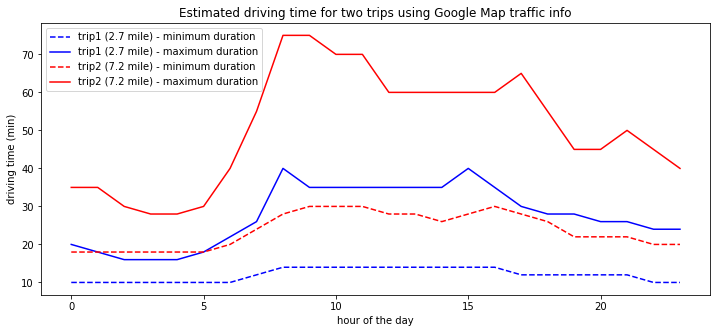

In [42]:
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, \
         13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# minimum & maximum duration in minutes
trip1_min = [10, 10, 10, 10, 10, 10, 10, 12, 14, 14, 14, 14, \
             14, 14, 14, 14, 14, 12, 12, 12, 12, 12, 10, 10]
trip1_max = [20, 18, 16, 16, 16, 18, 22, 26, 40, 35, 35, 35, \
             35, 35, 35, 40, 35, 30, 28, 28, 26, 26, 24, 24]

trip2_min = [18, 18, 18, 18, 18, 18, 20, 24, 28, 30, 30, 30, \
             28, 28, 26, 28, 30, 28, 26, 22, 22, 22, 20, 20]
trip2_max = [35, 35, 30, 28, 28, 30, 40, 55, 75, 75, 70, 70, \
             60, 60, 60, 60, 60, 65, 55, 45, 45, 50, 45, 40]

plt.figure(figsize=(12, 5))
plt.plot(hours, trip1_min, '--', c='b', label="trip1 (2.7 mile) - minimum duration")
plt.plot(hours, trip1_max, '-', c='b', label="trip1 (2.7 mile) - maximum duration")
plt.plot(hours, trip2_min, '--', c='r', label="trip2 (7.2 mile) - minimum duration")
plt.plot(hours, trip2_max, '-', c='r', label="trip2 (7.2 mile) - maximum duration")
plt.xlabel('hour of the day')
plt.ylabel('driving time (min)')
plt.title('Estimated driving time for two trips using Google Map traffic info')
plt.legend();

A more in-depth analysis of the fare / time dependency is illustrated below. Here, calculate per year and per hour the fare and do a linear regression. When investigating the plots, you see the price increase over the years.

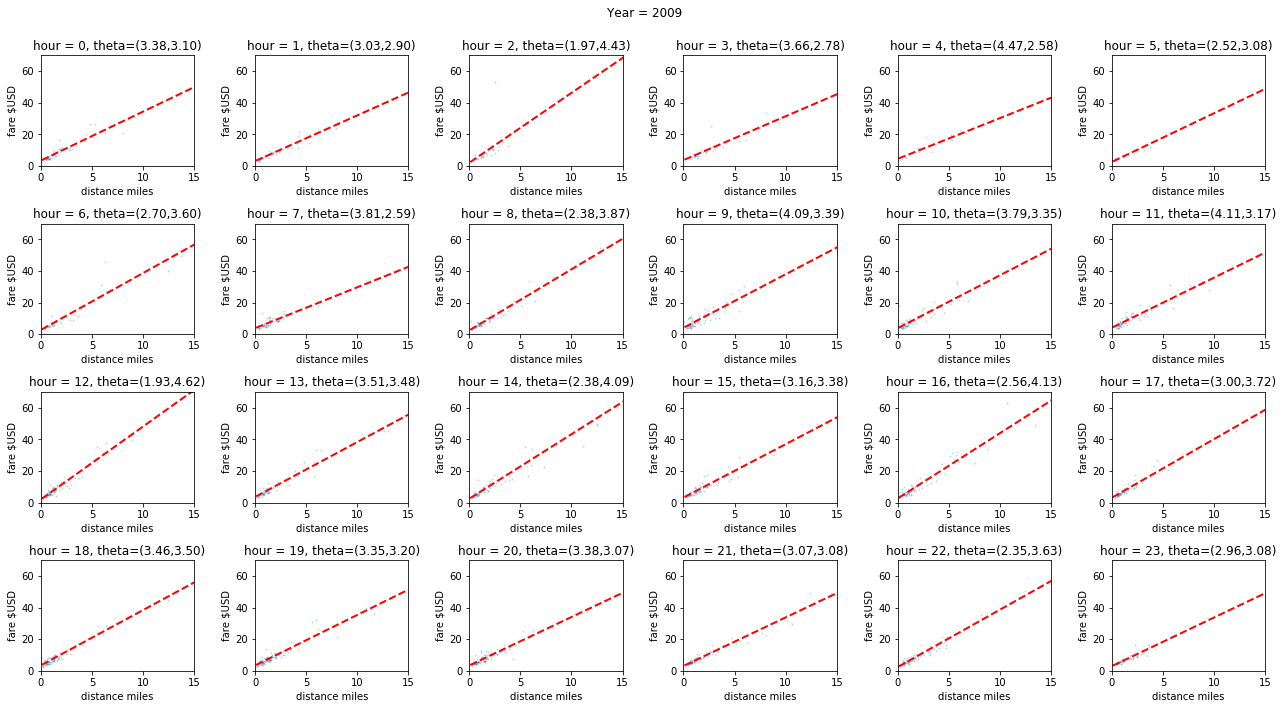

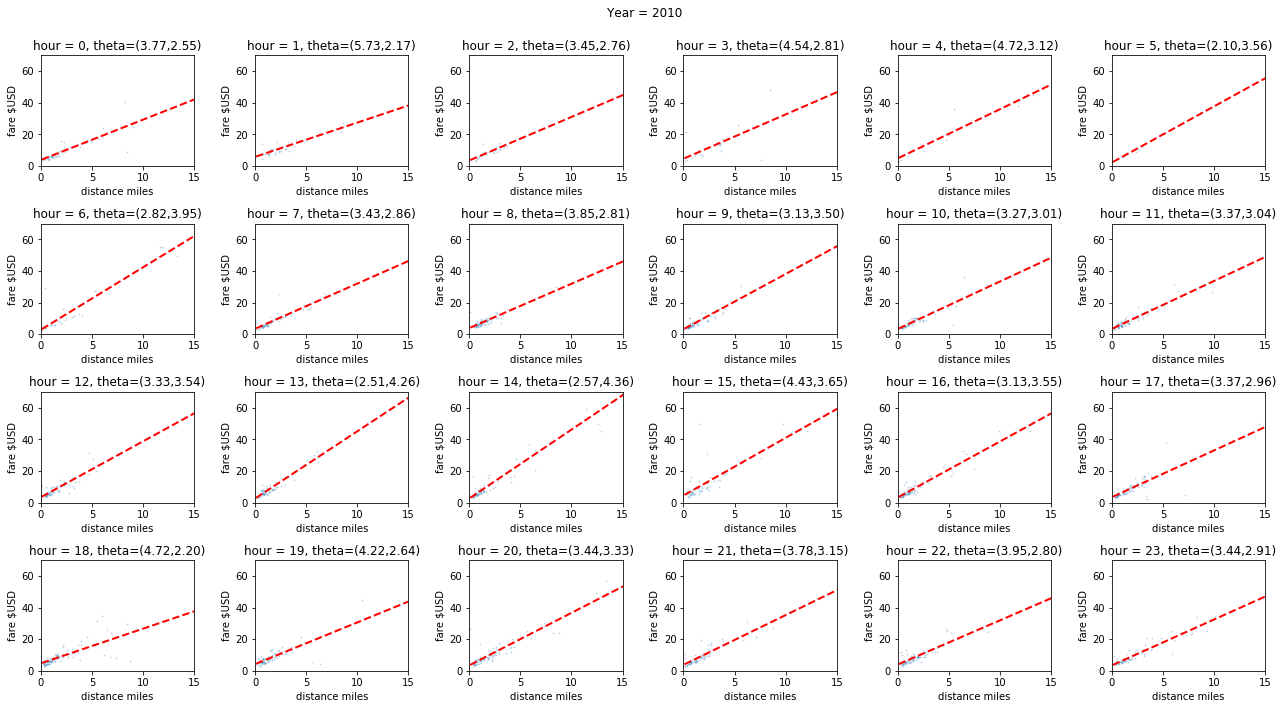

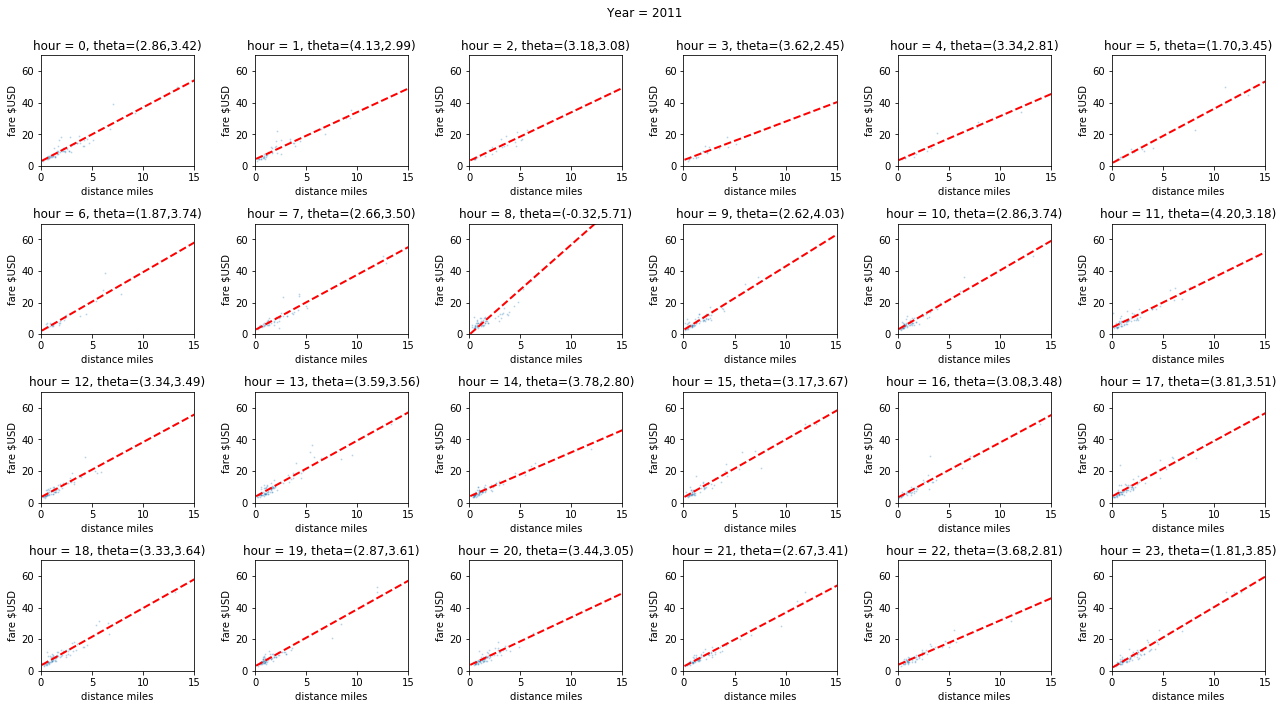

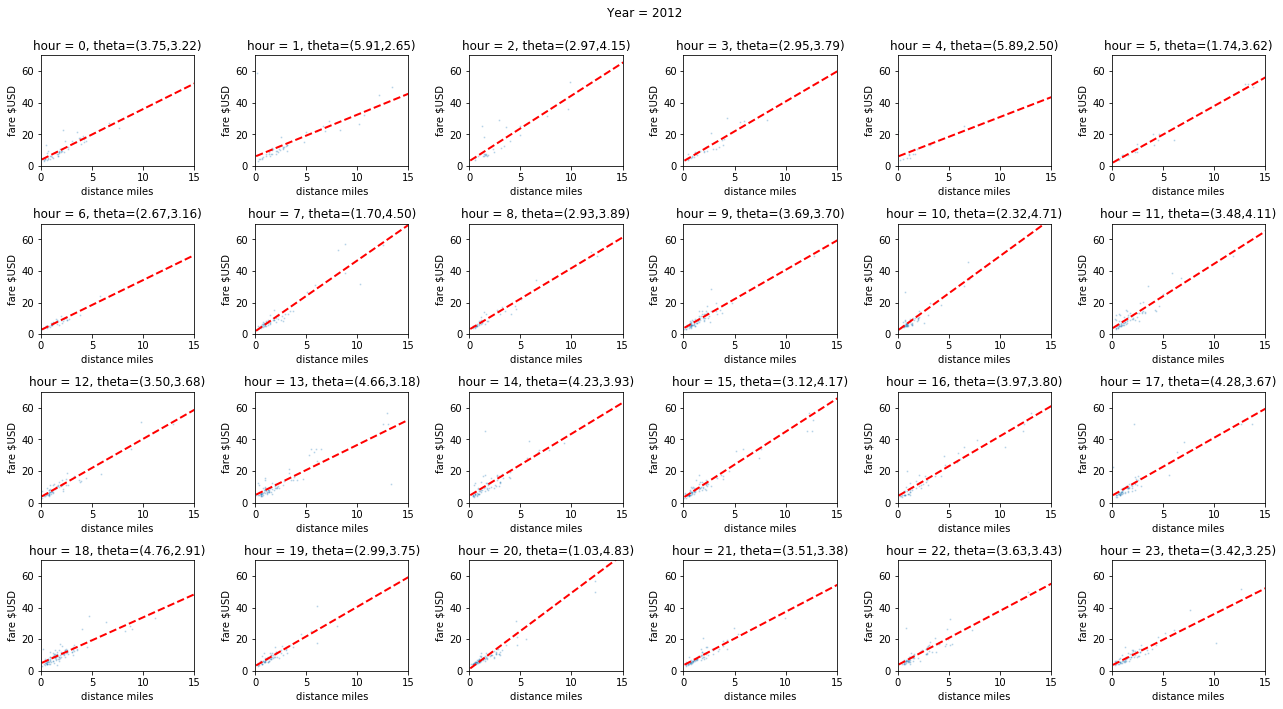

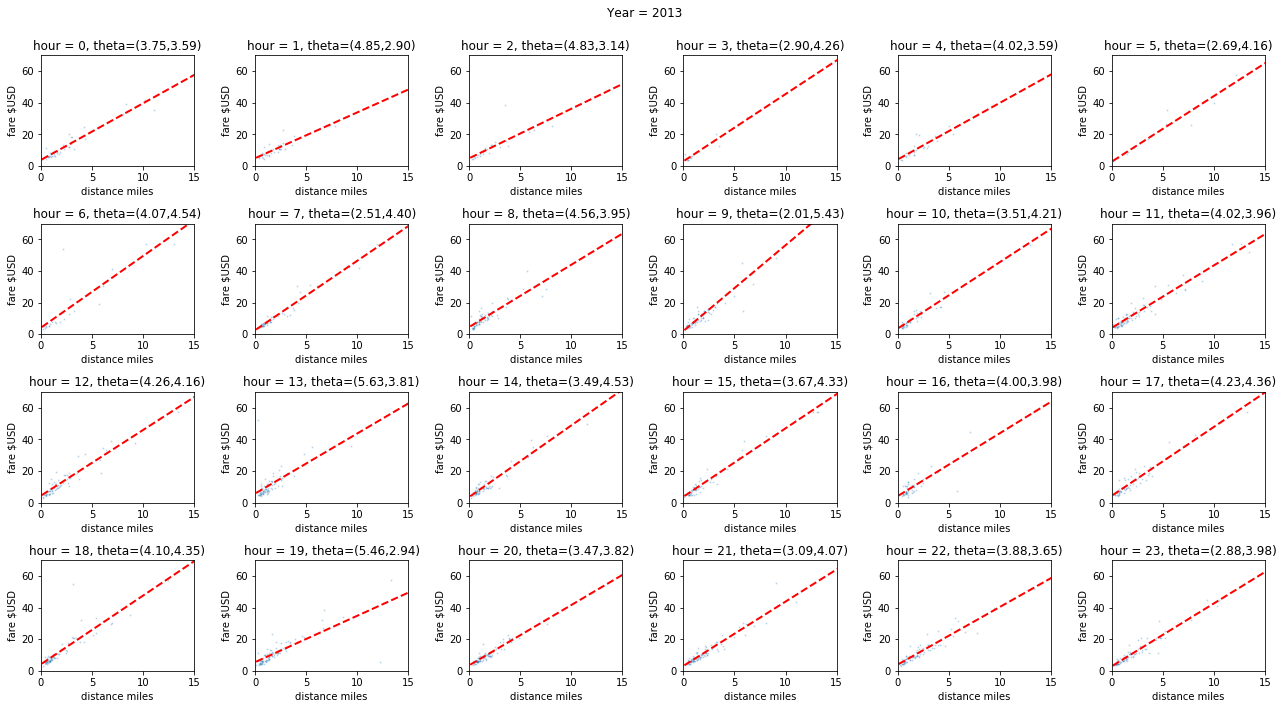

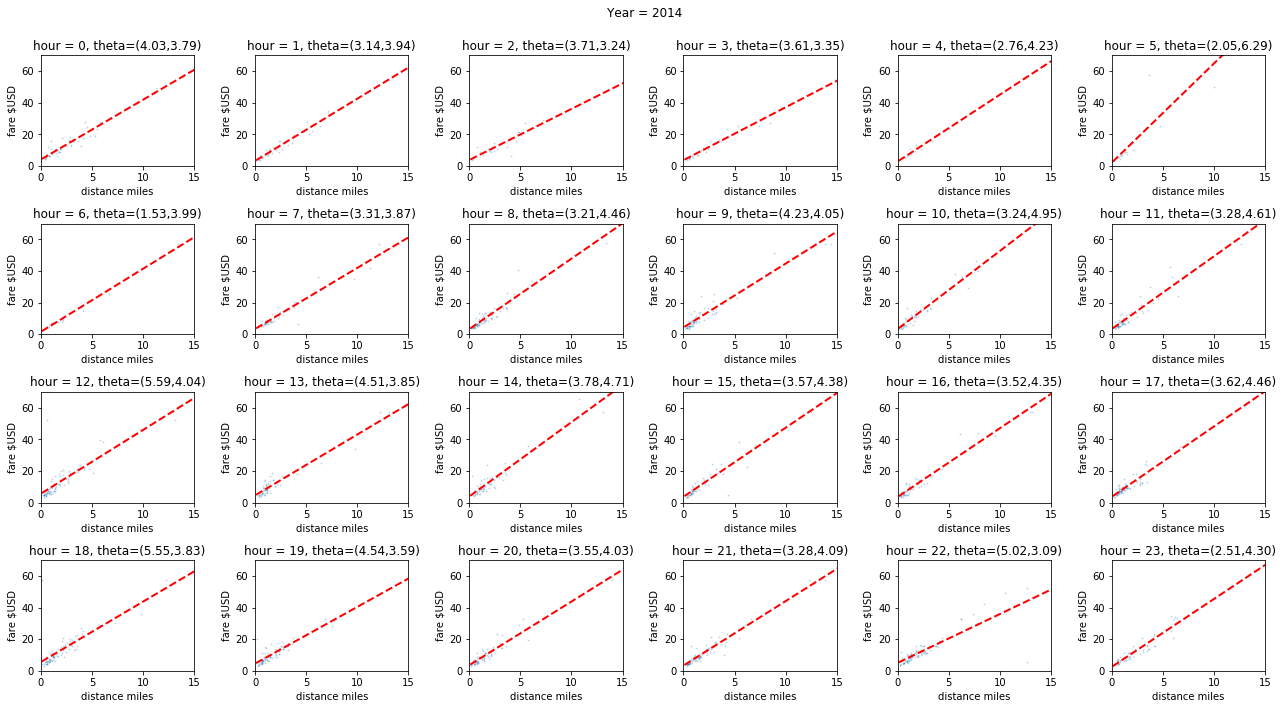

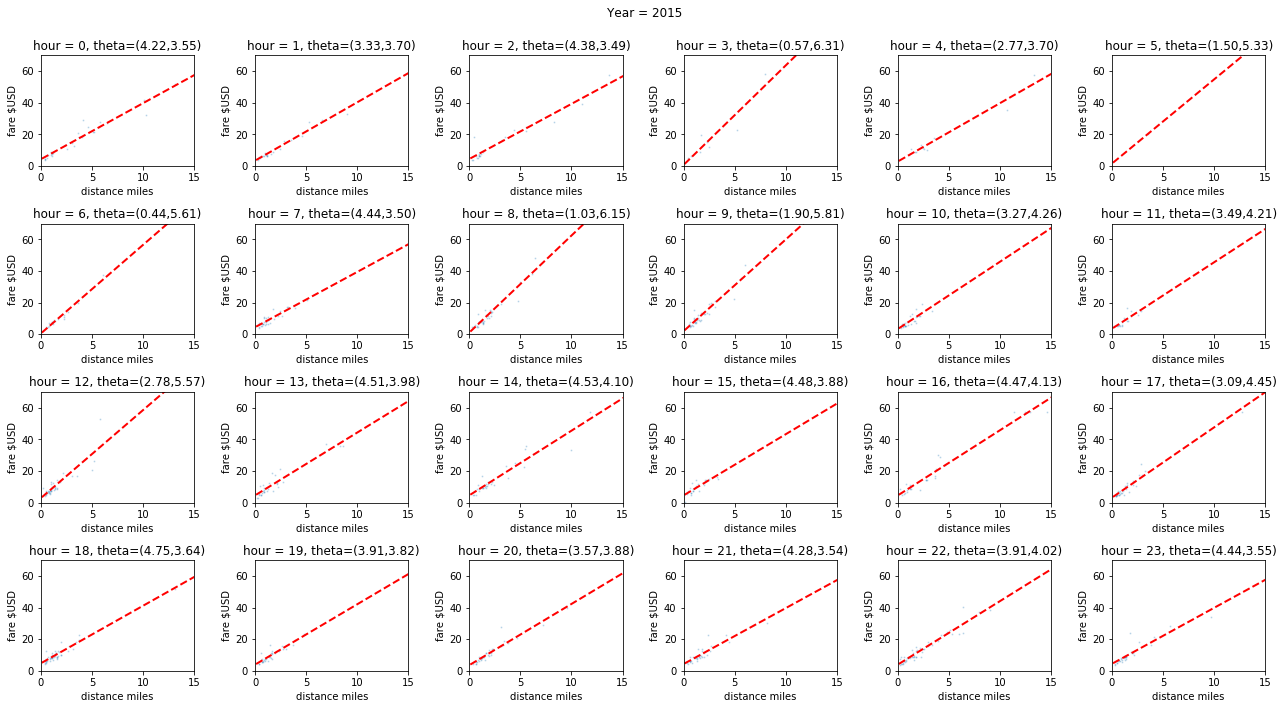

In [43]:
from sklearn.linear_model import LinearRegression

# plot all years
for year in train_df.year.unique():
    # create figure
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()
    
    # plot for all hours
    for h in range(24):
        idx = (train_df.distance_miles < 15) & (train_df.fare_amount < 100) & (train_df.hour == h) & \
              (train_df.year == year)
        axs[h].scatter(train_df[idx].distance_miles, train_df[idx].fare_amount, alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))

        model = LinearRegression(fit_intercept=False)
        x, y = train_df[idx].distance_miles.values.reshape(-1,1), train_df[idx].fare_amount.values.reshape(-1,1)
        X = np.concatenate((np.ones(x.shape), x), axis=1)
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.coef_[0][0] + xx * model.coef_[0][1], '--', c='r', lw=2)
        axs[h].set_title('hour = {}, theta=({:0.2f},{:0.2f})'.format(h, model.coef_[0][0], model.coef_[0][1]))

    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);

### Pickup location

To visualize whether the fare per km varies with the location the distance to the center of New York is calculated.

In [44]:
# add new column to dataframe with distance in mile
train_df['distance_to_center'] = distance(nyc[1], nyc[0], train_df.pickup_latitude, train_df.pickup_longitude)

Plotting the distance to NYC center vs distance of the trip vs the fare amount gives some insight in this complex relation.

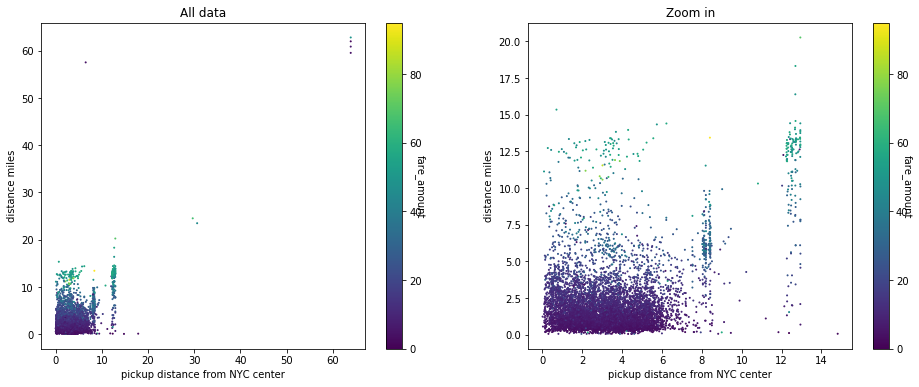

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(train_df.distance_to_center, train_df.distance_miles, c=np.clip(train_df.fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx = (train_df.distance_to_center < 15) & (train_df.distance_miles < 35)
im = axs[1].scatter(train_df[idx].distance_to_center, train_df[idx].distance_miles, 
                     c=np.clip(train_df[idx].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);


There are a lot of 'green' dots, which is about \$50 to \$60 fare amount near 13 miles distance of NYC center of distrance of trip. This could be due to trips from/to JFK airport. Let's remove them to see what we're left with.

In [46]:
train_df['pickup_distance_to_jfk'] = distance(jfk[1], jfk[0], train_df.pickup_latitude, train_df.pickup_longitude)
train_df['dropoff_distance_to_jfk'] = distance(jfk[1], jfk[0], train_df.dropoff_latitude, train_df.dropoff_longitude)

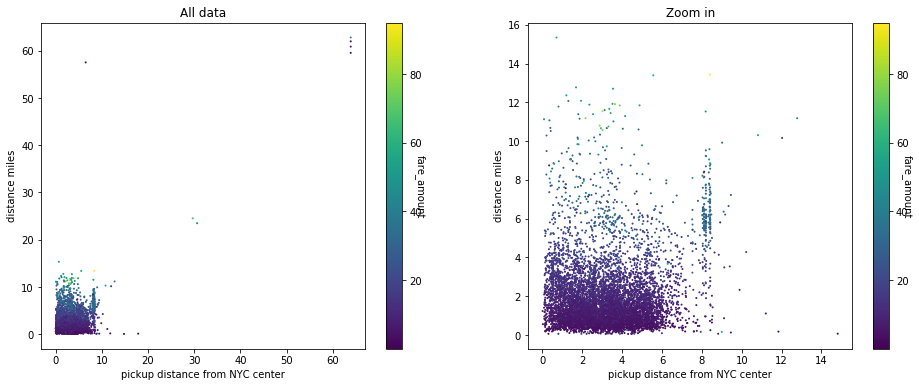

In [47]:
# remove all to/from JFK trips
idx = ~((train_df.pickup_distance_to_jfk < 1) | (train_df.dropoff_distance_to_jfk < 1))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(train_df[idx].distance_to_center, train_df[idx].distance_miles, 
                    c=np.clip(train_df[idx].fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx1 = idx & (train_df.distance_to_center < 15) & (train_df.distance_miles < 35)
im = axs[1].scatter(train_df[idx1].distance_to_center, train_df[idx1].distance_miles, 
                     c=np.clip(train_df[idx1].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

Now there are some 'yellow' dots (fare amount > \$80) left. To understand these datapoints we plot them on the map.

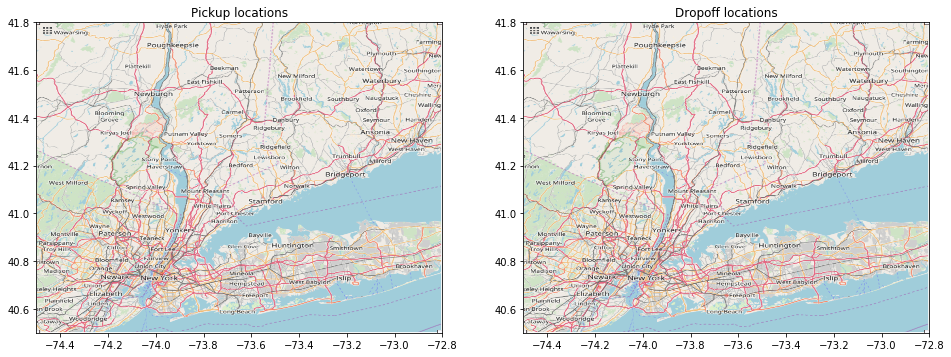

In [48]:
idx = (train_df.fare_amount>80) & (train_df.distance_miles<35) 
plot_on_map(train_df[idx], BB, nyc_map)

There seem to be a concentration of datapoints near dropoff (-74.2, 40.65). After looking these coordinates up on Google map we can learn NYC has a second airport: Newark Liberty International Airport. The fare from/to the airport from NYC center is around  80− 100 USD.

In [49]:
# also remove these datapoints to check; As there is also a third airport, LaGuardia Airport, remove them too.
train_df['pickup_distance_to_ewr'] = distance(ewr[1], ewr[0], train_df.pickup_latitude, train_df.pickup_longitude)
train_df['dropoff_distance_to_ewr'] = distance(ewr[1], ewr[0], train_df.dropoff_latitude,train_df.dropoff_longitude)
train_df['pickup_distance_to_lgr'] = distance(lgr[1], lgr[0], train_df.pickup_latitude,train_df.pickup_longitude)
train_df['dropoff_distance_to_lgr'] = distance(lgr[1], lgr[0], train_df.dropoff_latitude, train_df.dropoff_longitude)


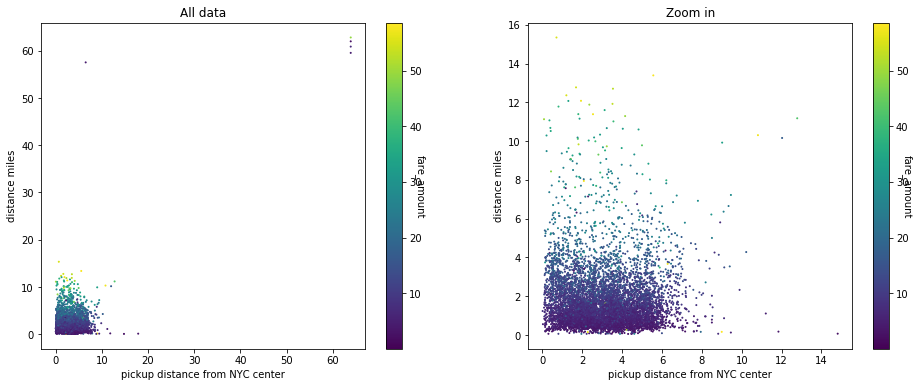

In [50]:
# remove all to/from airport trips
idx = ~((train_df.pickup_distance_to_jfk < 1) | (train_df.dropoff_distance_to_jfk < 1) |
        (train_df.pickup_distance_to_ewr < 1) | (train_df.dropoff_distance_to_ewr < 1) |
        (train_df.pickup_distance_to_lgr < 1) | (train_df.dropoff_distance_to_lgr < 1))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(train_df[idx].distance_to_center, train_df[idx].distance_miles, 
                    c=np.clip(train_df[idx].fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx1 = idx & (train_df.distance_to_center < 15) & (train_df.distance_miles < 35)
im = axs[1].scatter(train_df[idx1].distance_to_center, train_df[idx1].distance_miles, 
                     c=np.clip(train_df[idx1].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

Removing the to/from airport trips seems to give a more 'linear' view of the data. **Fare amount depends on distance travelled and not so much on starting position.**

Last,explore the test set, e.g. to see if the data has the same properties.

In [66]:
# add new column to dataframe with distance in km
test_df['distance_miles'] = distance(test_df.pickup_latitude, test_df.pickup_longitude, \
                                     test_df.dropoff_latitude, test_df.dropoff_longitude)
test_df['distance_to_center'] = distance(nyc[1], nyc[0], \
                                          test_df.dropoff_latitude, test_df.dropoff_longitude)
test_df['hour'] = test_df.pickup_datetime.apply(lambda t: pd.to_datetime(t).hour)
test_df['year'] = test_df.pickup_datetime.apply(lambda t: pd.to_datetime(t).year)

In [68]:
test_df.head()

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.763805         -73.981430         40.743835                1   
1        40.719383         -73.998886         40.739201                1   
2        40.751260         -73.979654         40.746139                1   
3        40.767807         -73.990448         40.751635                1   
4        40.789775         -73.988565         40.744427                1   

   distance_miles  distance_to_center  hour  year  
0        1.443607            2.431036    13  2015  
1        1.507044            1.773728    13  2015  
2        0.384398            2.615229    11  2011  
3        1.218529            2.720018    21  2012  
4        3.347514            2.289611    21  2012

## Model

Based on the analysis above, we would start with the following linear regression model:

$$ fare \sim year,hour,distance,passenger_count $$
 

In [69]:
# define dataset
# select points 15 miles near NYC center and remove zero passenger datapoints
idx = (train_df.distance_to_center<15) & (train_df.passenger_count!=0)
features = ['year', 'hour', 'distance_miles', 'passenger_count']
X = train_df[idx][features].values
y = train_df[idx]['fare_amount'].values

In [70]:
X.shape, y.shape

((8711, 4), (8711,))

In [71]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [72]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

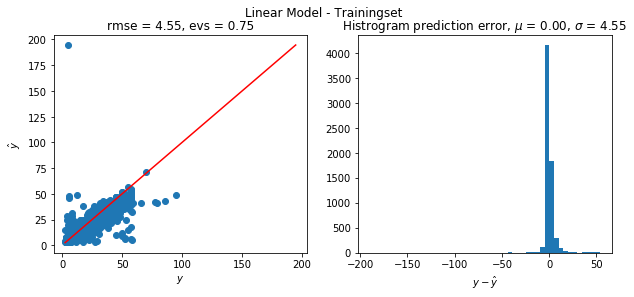

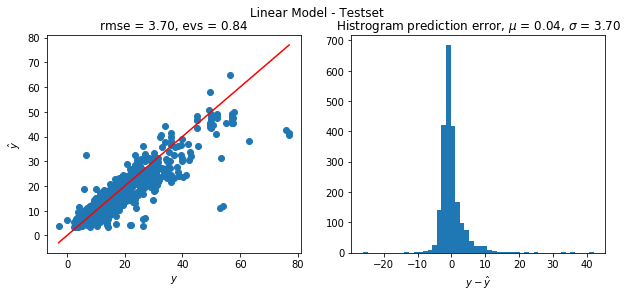

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)
plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

In [74]:
# some handy function to see how sensitive the model is to the selection
# of the training and test set
def plot_rmse_analysis(model, X, y, N=400, test_size=0.25, figsize=(10,4), title=''):
    rmse_train, rmse_test = [], []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    g = sns.jointplot(np.array(rmse_train), np.array(rmse_test), kind='scatter', stat_func=None, size=5)
    g.set_axis_labels("RMSE training ($\mu$={:.2f})".format(np.mean(rmse_train)), 
                      "RMSE test ($\mu$={:.2f})".format(np.mean(rmse_test)))
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('{} (N={}, test_size={:0.2f})'.format(title, N, test_size))

In [ ]:
# only 100k points are used to shorten calculation time
plot_rmse_analysis(model_lin, X[:100_000,:], y[:100_000], title='Linear model')


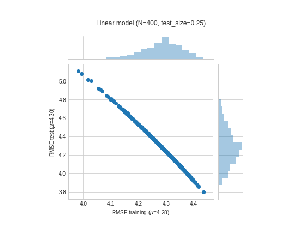

In [76]:
# model runned from blogger on kaggle
img=Image.open('../project/RMSE training.png')
plt.axis('off')
plt.imshow(img)
plt.show()

### TEST

In [62]:
"""test_df =  pd.read_csv('../project/test.csv')
print(test_df.head())
#test_df = add_datetime_info(test_df)
#test_df['distance'] = sphere_dist(test_df['pickup_latitude'], test_df['pickup_longitude'], 
                                   #test_df['dropoff_latitude'] , test_df['dropoff_longitude'])
                                   """

                           key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1  
2        40.751260         -73.979654         40.746139                1  
3        40.767807         -73.990448         40.751635                1  
4        40.789775         -73.988565         40.744427                1  


In [ ]:
"""test_df['bearing'] = sphere_dist_bear(test_df['pickup_latitude'], test_df['pickup_longitude'], 
                                    test_df['dropoff_latitude'] , test_df['dropoff_longitude'])  
test_df['pickup_latitude'] = radian_conv(test_df['pickup_latitude'])
test_df['pickup_longitude'] = radian_conv(test_df['pickup_longitude'])
test_df['dropoff_latitude'] = radian_conv(test_df['dropoff_latitude'])
test_df['dropoff_longitude'] = radian_conv(test_df['dropoff_longitude'])
"""

In [78]:
# define dataset
XTEST = test_df[features].values
filename = './output/baseline_linear'

y_pred_final = model_lin.predict(XTEST)

submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': y_pred_final},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

In [79]:
submission

key  fare_amount
0       2015-01-27 13:08:24.0000002    10.624149
1       2015-01-27 13:08:24.0000003    10.841645
2       2011-10-08 11:53:44.0000002     4.989556
3       2012-12-01 21:12:12.0000002     8.406786
4       2012-12-01 21:12:12.0000003    15.705973
5       2012-12-01 21:12:12.0000005    11.094271
6       2011-10-06 12:10:20.0000001     5.658004
7       2011-10-06 12:10:20.0000003    49.565797
8       2011-10-06 12:10:20.0000002    11.930553
9       2014-02-18 15:22:20.0000002     7.531855
10      2014-02-18 15:22:20.0000003    10.126402
11      2014-02-18 15:22:20.0000001    15.455485
12      2010-03-29 20:20:32.0000002     4.767070
13      2010-03-29 20:20:32.0000001     6.796949
14      2011-10-06 03:59:12.0000002     8.958444
15      2011-10-06 03:59:12.0000001    14.521545
16      2012-07-15 16:45:04.0000006     4.835899
17      2012-07-15 16:45:04.0000002     9.591523
18      2012-07-15 16:45:04.0000003     5.861894
19      2012-07-15 16:45:04.0000004     5.109531
20      2014-10-29 02:09:56.0000001     8.630621
21     2014-06-14 13:39:00.00000010     9.372100
22     2014-06-14 13:39:00.00000060     7.958032
23     2014-06-14 13:39:00.00000087     9.227415
24     2014-06-14 13:39:00.00000050    17.489859
25      2014-06-14 13:39:00.0000003     7.566569
26    2014-06-14 13:39:00.000000158    35.655057
27     2014-06-14 13:39:00.00000015    25.261733
28     2014-06-14 13:39:00.00000073     7.615231
29     2014-06-14 13:39:00.00000077    15.181934
...                             ...          ...
9884   2013-09-25 22:00:00.00000060    36.885975
9885  2013-09-25 22:00:00.000000213    15.341525
9886  2013-09-25 22:00:00.000000150    20.391575
9887   2013-09-25 22:00:00.00000010     8.256972
9888  2013-09-25 22:00:00.000000146     4.676431
9889   2013-09-25 22:00:00.00000041     9.741837
9890  2013-09-25 22:00:00.000000109    10.949449
9891  2013-09-25 22:00:00.000000210    17.358123
9892  2013-09-25 22:00:00.000000151    10.961762
9893  2013-09-25 22:00:00.000000190    14.764487
9894  2013-09-25 22:00:00.000000153    11.283448
9895  2013-09-25 22:00:00.000000241    23.850366
9896  2013-09-25 22:00:00.000000127     9.785379
9897    2015-02-20 11:08:29.0000001    16.432208
9898    2015-01-12 15:36:37.0000002     6.813246
9899    2015-06-07 00:38:14.0000002    17.493243
9900    2015-04-12 21:56:22.0000005     9.693738
9901    2015-04-10 11:56:54.0000004     8.866136
9902    2015-06-25 01:01:46.0000002    13.837157
9903    2015-05-29 10:02:42.0000001    10.498842
9904    2015-06-30 20:03:50.0000002    37.809928
9905    2015-02-27 19:36:02.0000006    26.134989
9906    2015-06-15 01:00:06.0000002     6.333988
9907    2015-02-03 09:00:58.0000001    26.736202
9908    2015-05-19 13:58:11.0000001     9.104486
9909    2015-05-10 12:37:51.0000002    10.139146
9910    2015-01-12 17:05:51.0000001    12.610554
9911    2015-04-19 20:44:15.0000001    46.528808
9912    2015-01-31 01:05:19.0000005    23.321439
9913    2015-01-18 14:06:23.0000006     8.139906

[9914 rows x 2 columns]